In [1]:
options(repr.plot.width=15, repr.plot.height=10)

In [5]:
library(plyr)
library(ggplot2)
library(corpcor)
library(evolqg)
library(tidyverse)
library(cowplot)
library(patchwork)
library(psych)
library(doMC)
registerDoMC(8)

In [6]:
#data_folder = "/Genomics/ayroleslab2/lamaya/bigProject/eQTLcatalog/modularity/matrices"
data_folder = "./"
dir(data_folder)

[1] "__pycache__"                                                                     
 [2] "body_graph.png"                                                                  
 [3] "body_graph.svg"                                                                  
 [4] "body_table_wcgna_fdrLevel-1e-05.csv"                                             
 [5] "body_table_wcgna_fdrLevel-1e-06.csv"                                             
 [6] "body_transposed_table_wcgna_fdrLevel-1e-06.csv"                                  
 [7] "body-block.1.RData"                                                              
 [8] "Control-BodyHead - NetworkStats.ipynb"                                           
 [9] "Correlations between head and body - The SVA trials.ipynb"                       
[10] "Decoherence for the masses.ipynb"                                                
[11] "export_blocks.py"                                                                
[12] "FETCH_HEAD"                                                                      
[13] "fit_sbm.py"                                                                      
[14] "Graph Tool - Control-Body-HighQC - Graph Structure .ipynb"                       
[15] "Graph tool network inference.ipynb"                                              
[16] "Graph Tool Small network Resource Paper - Control-BodyHead - Make Networks.ipynb"
[17] "GraphTool-Control-Head-HighQC-NullModels.ipynb"                                  
[18] "GraphTool-ResourcePaper-Control-Body-HighQC.ipynb"                               
[19] "GraphTool-ResourcePaper-Control-BodyHead-Plots.ipynb"                            
[20] "GraphTool-ResourcePaper-Control-Head-HighQC.ipynb"                               
[21] "head_graph.png"                                                                  
[22] "head_graph.svg"                                                                  
[23] "head_table_wcgna_fdrLevel-1e-04.csv"                                             
[24] "head_table_wcgna_fdrLevel-1e-05.csv"                                             
[25] "head_table_wcgna_fdrLevel-1e-06.csv"                                             
[26] "head_transposed_table_wcgna_fdrLevel-1e-06.csv"                                  
[27] "head-block.1.RData"                                                              
[28] "make_network.py"                                                                 
[29] "run_initial_sbm_body.sh"                                                         
[30] "run_initial_sbm_head.sh"                                                         
[31] "run_sbm_body_fdr1e-5.sh"                                                         
[32] "run_sbm_body_fdr1e-6.sh"                                                         
[33] "run_sbm_body.sh"                                                                 
[34] "run_sbm_head_fdr1e-4.sh"                                                         
[35] "run_sbm_head_fdr1e-5.sh"                                                         
[36] "run_sbm_head_fdr1e-6.sh"                                                         
[37] "run_sbm_head_fdr1e-7.sh"                                                         
[38] "run_sbm_head.sh"                                                                 
[39] "trim_networks.py"                                                                
[40] "trim_networks.sh"                                                                
[41] "WGCNA last chance.ipynb"                                                         
[42] "WGCNA-SBM-comparison.ipynb"

In [7]:
expr_list = list(head = read.table(file.path(data_folder, 
                                             "head_table_wcgna_fdrLevel-1e-04.csv"), 
                                   row.names = 1, header = TRUE, sep = ","),
                 body = read.table(file.path(data_folder, 
                                             "body_table_wcgna_fdrLevel-1e-05.csv"), 
                                   row.names = 1, header = TRUE, sep = ","))

In [9]:
if(!require(WGCNA)){BiocManager::install("WGCNA"); library(WGCNA)}
if(!require(doMC)){install.packages("doMC"); library(doMC)}   
if(!require(tictoc)){install.packages("tictoc"); library(tictoc)}   
library(foreach)
registerDoMC(8)

In [35]:
blockWise_power2_spearman = llply(names(expr_list),
                  function(x) {
                      blockwiseModules(expr_list[[x]], 
                                        power = 1,
                                        TOMType = "signed", minModuleSize = 10,
                                        reassignThreshold = 0, mergeCutHeight = 0.1,
                                        numericLabels = TRUE, pamRespectsDendro = FALSE,
                                        maxBlockSize = 10000,
                                        saveTOMs = TRUE,
                                        saveTOMFileBase = x,  corType = "bicor",
                                        verbose = 3)}, .parallel = TRUE)

In [36]:
names(blockWise_power2_spearman) = names(expr_list)

In [37]:
llply(blockWise_power2_spearman[c("body", "head")], function(x) table(x$colors))

$body

   0    1    2    3    4    5    6    7 
 828 2053  162   94   37   33   23   23 

$head

   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
1605  583  262  225  142  141  105   68   68   60   50   47   37   34   33   25 
  16   17   18   19   20   21 
  24   23   17   16   12   12 


In [154]:
pickSoftThreshold(expr_list[["body"]], corFnc="bicor", networkType = "signed" )

   Power SFT.R.sq  slope truncated.R.sq  mean.k. median.k. max.k.
1      1   0.0363   9.37          0.528 1630.000  1.64e+03 1690.0
2      2   0.8690 -20.60          0.973  846.000  8.36e+02  980.0
3      3   0.9490 -12.00          0.989  452.000  4.41e+02  617.0
4      4   0.9600  -7.63          0.985  247.000  2.38e+02  411.0
5      5   0.9650  -5.52          0.980  139.000  1.31e+02  285.0
6      6   0.9680  -4.37          0.977   80.100  7.30e+01  204.0
7      7   0.9700  -3.63          0.971   47.200  4.14e+01  151.0
8      8   0.9760  -3.09          0.970   28.400  2.38e+01  114.0
9      9   0.9720  -2.69          0.964   17.500  1.38e+01   87.6
10    10   0.9650  -2.38          0.962   11.000  8.09e+00   68.7
11    12   0.9470  -1.97          0.966    4.710  2.87e+00   46.5
12    14   0.9410  -1.70          0.969    2.240  1.05e+00   35.1
13    16   0.9140  -1.52          0.942    1.200  3.95e-01   27.9
14    18   0.9320  -1.38          0.940    0.719  1.53e-01   23.4
15    20  

Power,SFT.R.sq,slope,truncated.R.sq,mean.k.,median.k.,max.k.
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.03627884,9.371128,0.5279383,1633.5107762,1.635853e+03,1694.44595
2,0.86886357,-20.644417,0.9729279,846.4192505,8.363388e+02,980.42946
3,0.94875647,-11.955135,0.9888214,451.5213936,4.409246e+02,617.36478
4,0.95979310,-7.625288,0.9850603,247.4835246,2.377667e+02,411.06948
5,0.96545671,-5.519927,0.9801608,139.1267666,1.309955e+02,284.69649
6,0.96834577,-4.373162,0.9771763,80.0998236,7.296810e+01,204.48963
7,0.97008983,-3.628214,0.9713838,47.1800752,4.140641e+01,150.75950
8,0.97583432,-3.085251,0.9704585,28.4161992,2.376139e+01,113.71013
9,0.97159852,-2.689196,0.9636275,17.5012349,1.378870e+01,87.56100


In [153]:
pickSoftThreshold(expr_list[["head"]], corFnc="bicor", networkType = "signed" )

   Power SFT.R.sq  slope truncated.R.sq  mean.k. median.k. max.k.
1      1    0.064  41.40          0.975 1800.000  1.80e+03 1830.0
2      2    0.237 -22.30          0.547  916.000  9.13e+02  978.0
3      3    0.797 -19.00          0.799  474.000  4.69e+02  555.0
4      4    0.937 -12.90          0.926  249.000  2.44e+02  334.0
5      5    0.960  -8.93          0.951  133.000  1.28e+02  213.0
6      6    0.962  -6.60          0.953   72.700  6.80e+01  144.0
7      7    0.969  -5.03          0.961   40.400  3.65e+01  102.0
8      8    0.983  -4.01          0.978   22.900  1.98e+01   75.3
9      9    0.979  -3.35          0.974   13.300  1.08e+01   57.7
10    10    0.976  -2.90          0.972    7.940  6.00e+00   45.6
11    12    0.976  -2.30          0.975    3.080  1.89e+00   30.9
12    14    0.977  -1.90          0.975    1.360  6.19e-01   22.5
13    16    0.970  -1.67          0.968    0.688  2.10e-01   17.1
14    18    0.970  -1.50          0.969    0.394  7.34e-02   13.4
15    20  

Power,SFT.R.sq,slope,truncated.R.sq,mean.k.,median.k.,max.k.
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.06400341,41.351274,0.9746921,1798.9574841,1.798418e+03,1826.31690
2,0.23668764,-22.253629,0.5474687,916.1667211,9.131102e+02,977.51204
3,0.79741434,-18.975695,0.7991220,474.0445096,4.689592e+02,554.52899
4,0.93722649,-12.919024,0.9258750,249.3228989,2.436615e+02,333.90783
5,0.96026041,-8.926375,0.9514075,133.3915454,1.279429e+02,213.26360
6,0.96178323,-6.600658,0.9532836,72.6736130,6.795597e+01,143.84191
7,0.96908822,-5.032725,0.9614116,40.3754448,3.648416e+01,101.89251
8,0.98259412,-4.012009,0.9782193,22.9149842,1.978625e+01,75.31351
9,0.97879934,-3.352787,0.9740095,13.3139407,1.084490e+01,57.70440


In [160]:
dissTOM_list_bicor <-
list(body = 1 - TOMsimilarityFromExpr(expr_list[["body"]], networkType = "signed", power = 8, corType = "bicor"),
     head = 1 - TOMsimilarityFromExpr(expr_list[["head"]], networkType = "signed", power = 6, corType = "bicor"))

TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.
TOM calculation: adjacency..
..will not use multithreading.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


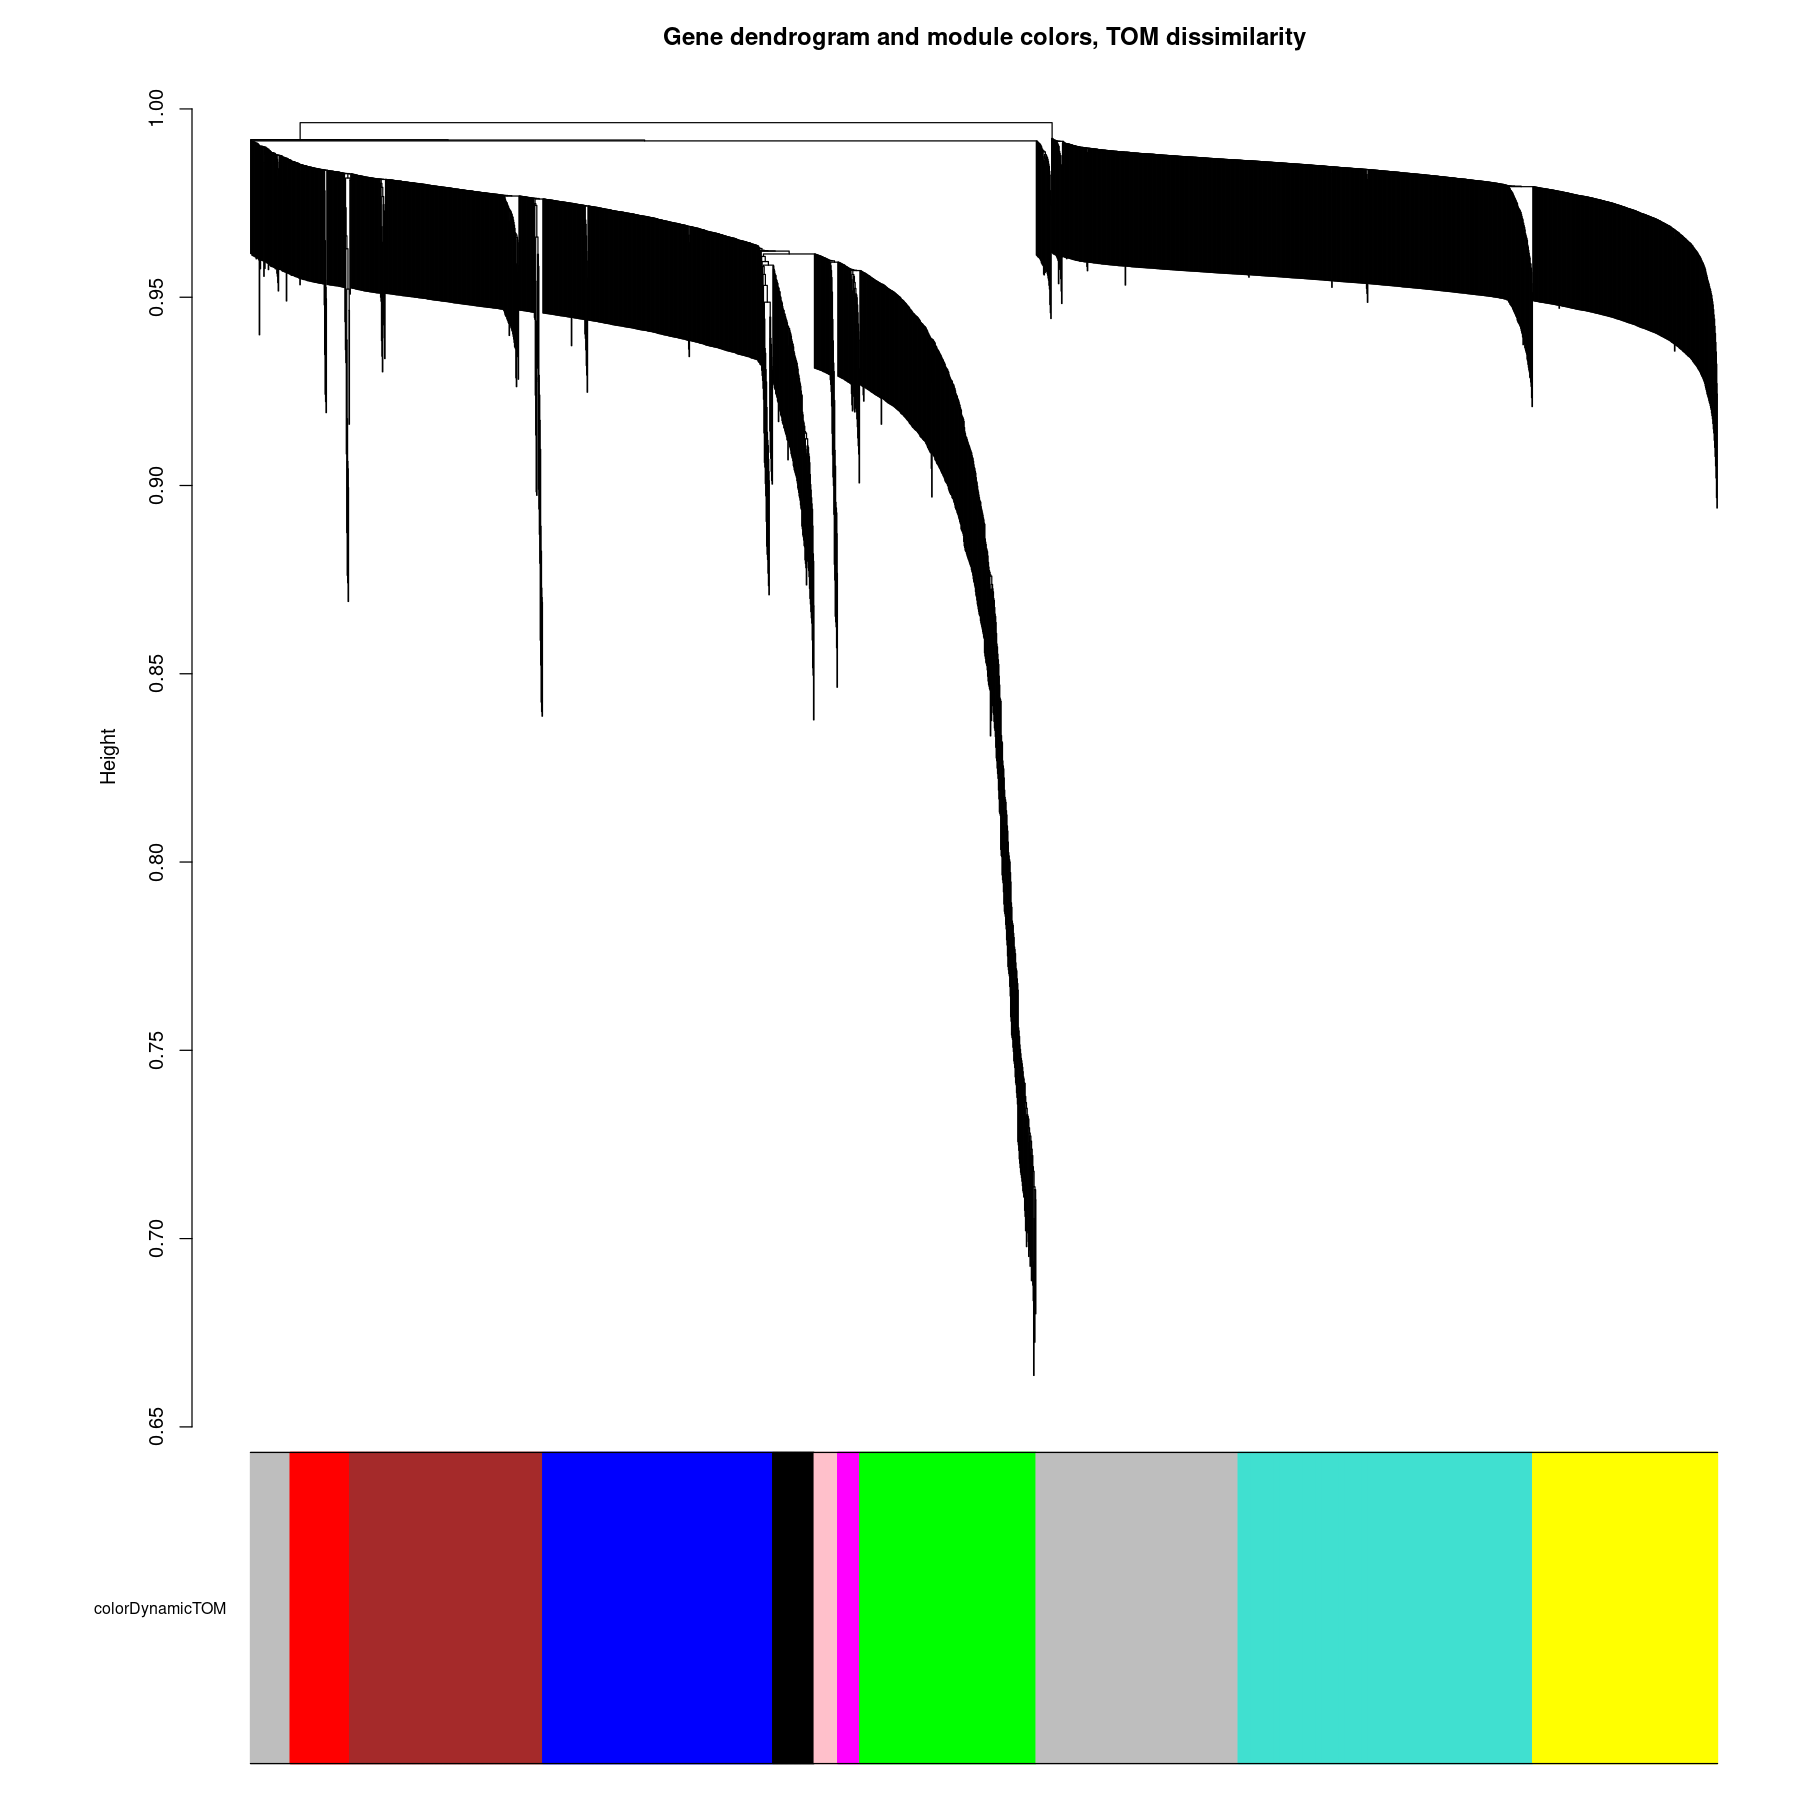

In [190]:
dissTOM = dissTOM_list_bicor[["body"]]
hierTOM = hclust(as.dist(dissTOM),method="average");

colorDynamicTOM = labels2colors (cutreeDynamic(hierTOM,method="tree"))
body_modules = cutreeDynamic(hierTOM,method="tree")
plotDendroAndColors(hierTOM,
                    colors=data.frame(colorDynamicTOM),
                    dendroLabels = FALSE, marAll = c(1, 8, 3, 1),
                    main = "Gene dendrogram and module colors, TOM dissimilarity")

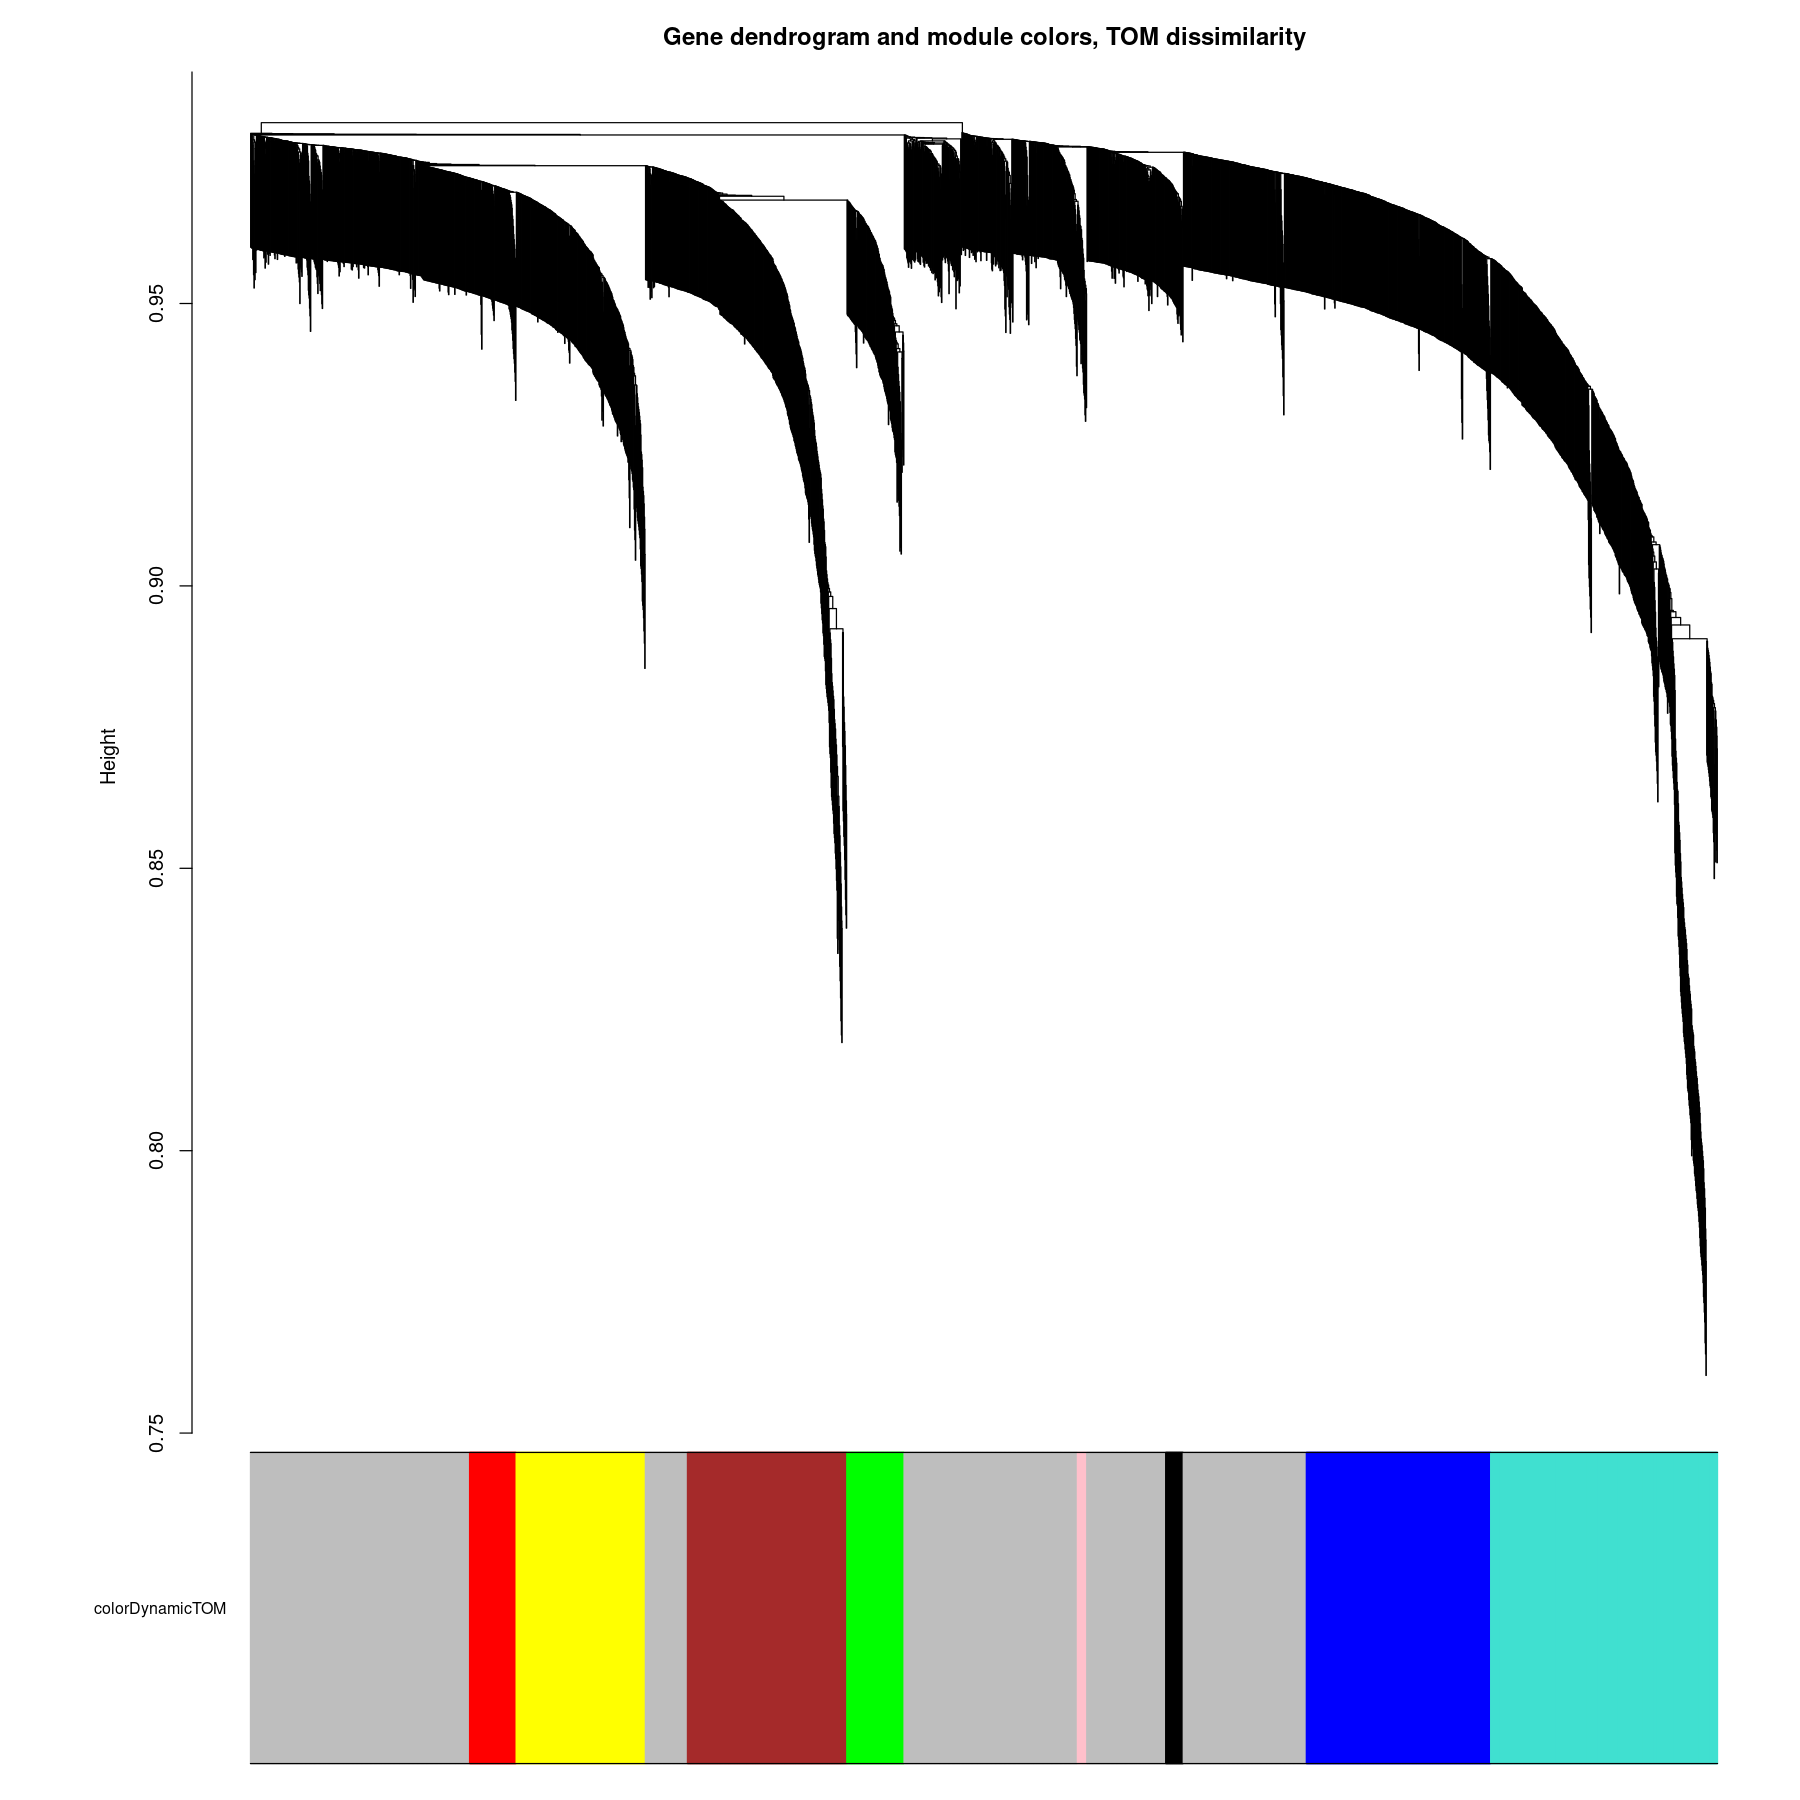

In [191]:
dissTOM = dissTOM_list_bicor[["head"]]
hierTOM = hclust(as.dist(dissTOM),method="average");

colorDynamicTOM = labels2colors (cutreeDynamic(hierTOM,method="tree"))
head_modules = cutreeDynamic(hierTOM,method="tree")
plotDendroAndColors(hierTOM,
                    colors=data.frame(colorDynamicTOM),
                    dendroLabels = FALSE, marAll = c(1, 8, 3, 1),
                    main = "Gene dendrogram and module colors, TOM dissimilarity")

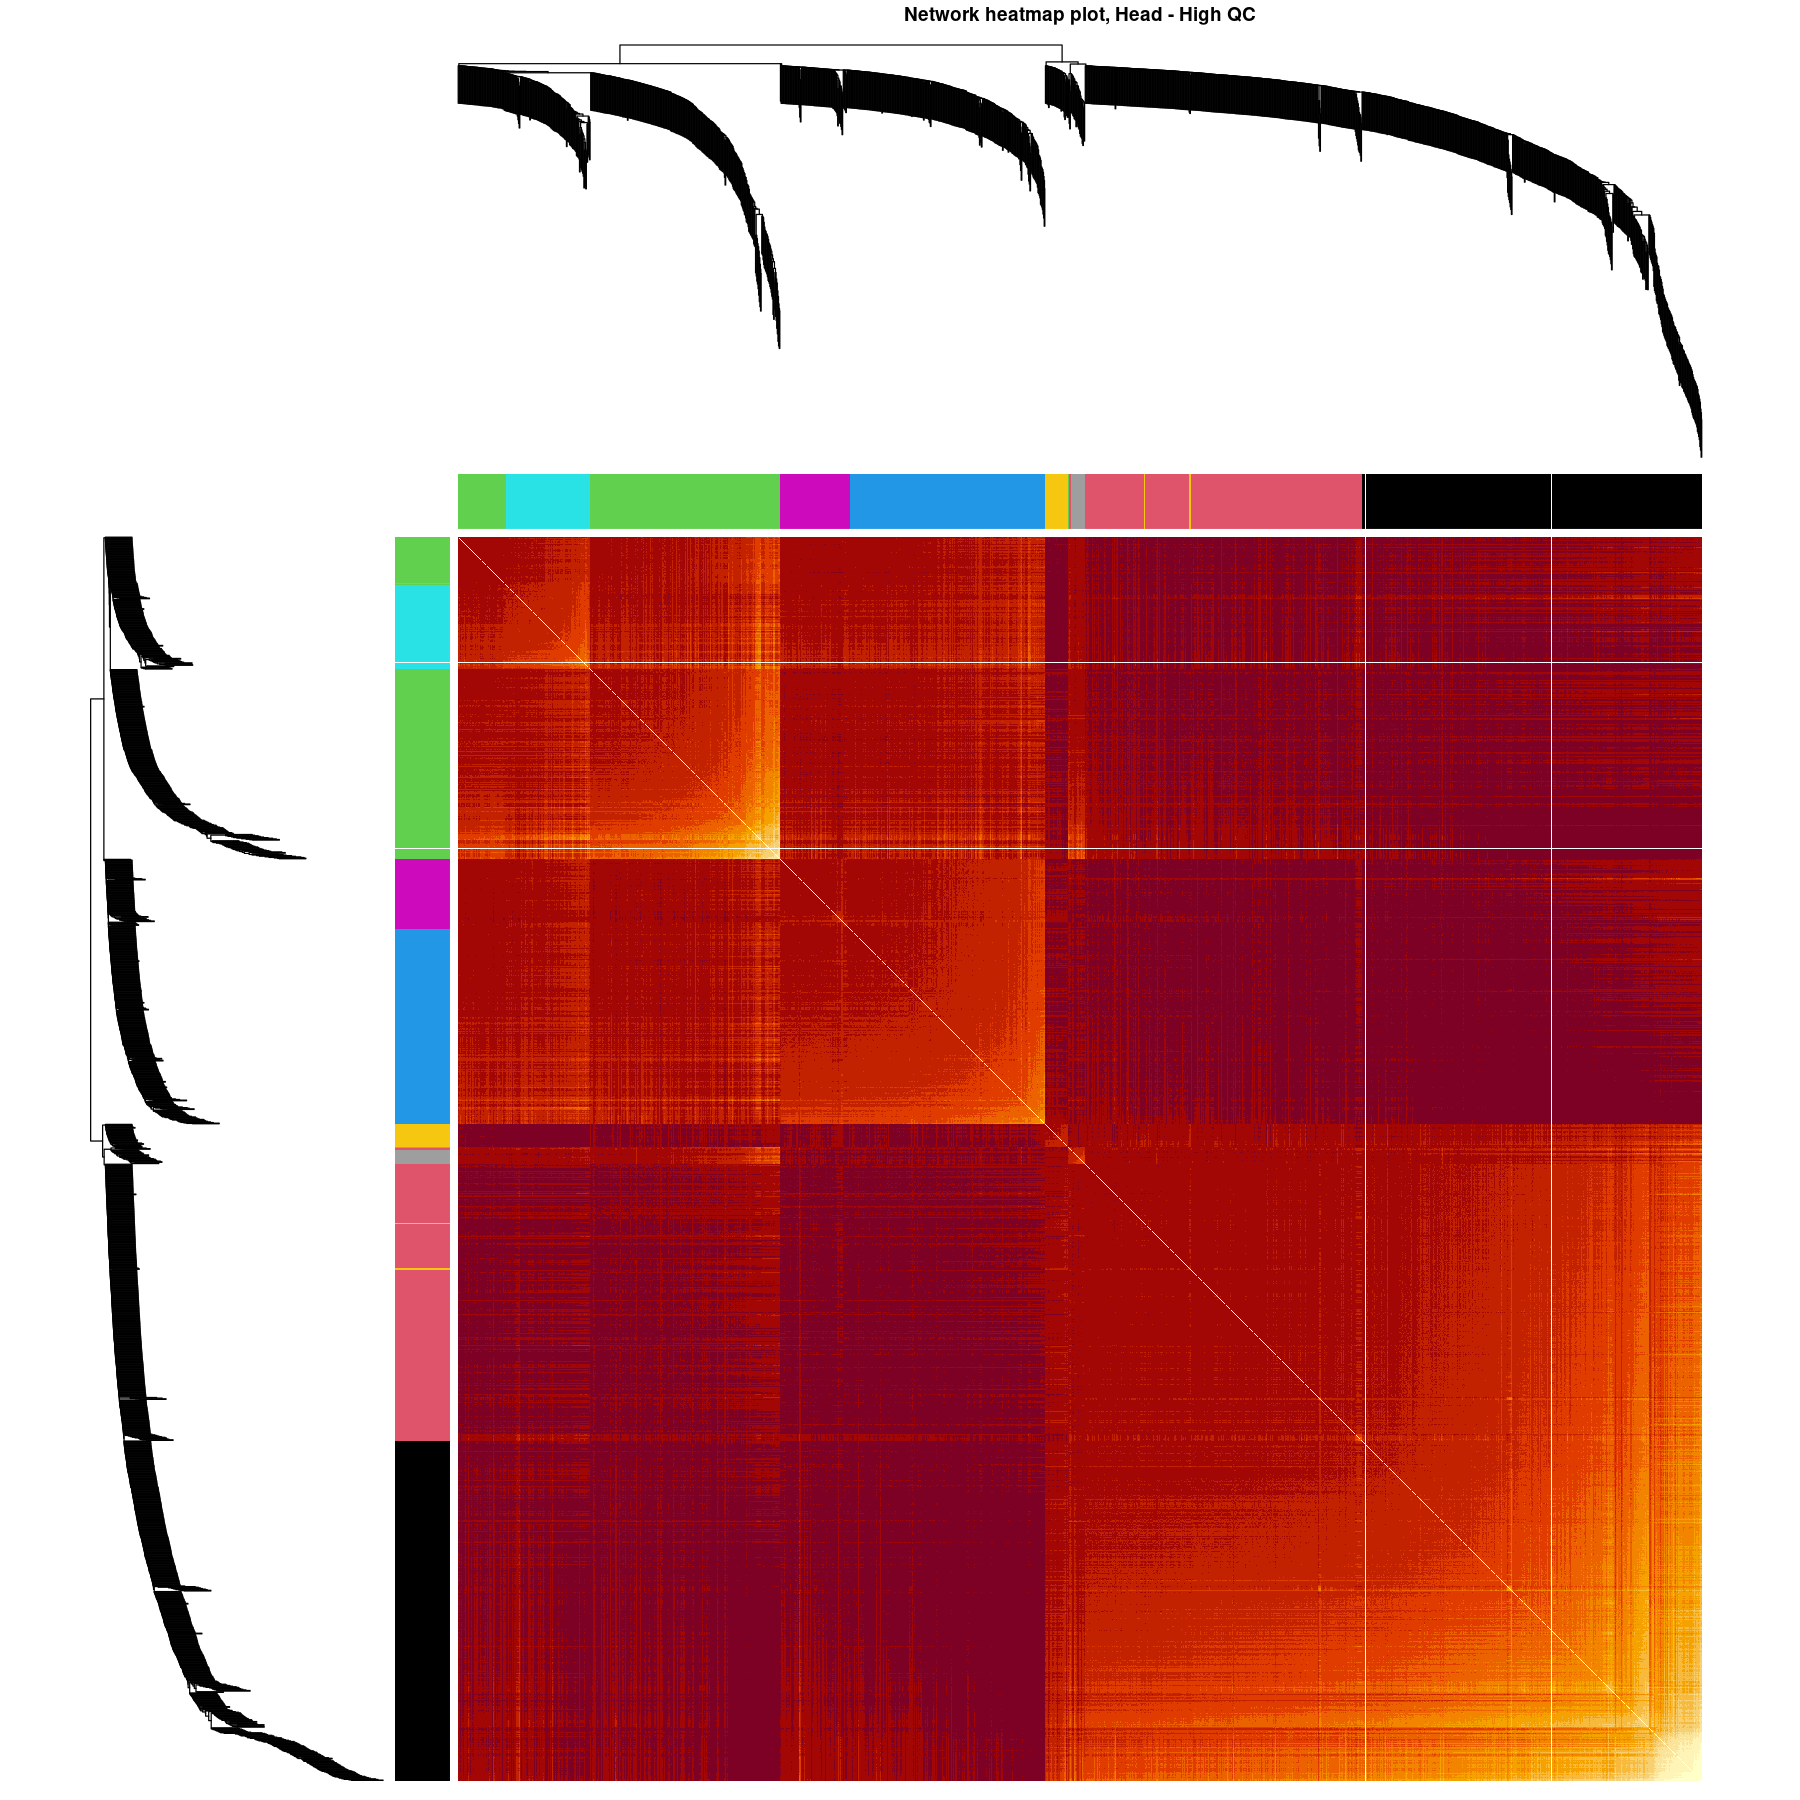

In [192]:
options(repr.plot.width=15, repr.plot.height=15)

data_index = "head"

nGenes = ncol(expr_list[[data_index]])
nSamples = nrow(expr_list[[data_index]])
dissTOM = dissTOM_list_bicor[[data_index]]

nSelect = ifelse(sum((moduleColors != 0)) > 2000, 2000, sum((moduleColors != 0)))
select = sample(nGenes, size = nSelect);
moduleColors = head_modules
select = sample(which(moduleColors != 0), size = nSelect)

selectTOM = dissTOM[select, select];
selectTree = hclust(as.dist(selectTOM), method = "average")
selectColors = moduleColors[select];
plotDiss = selectTOM^7;
diag(plotDiss) = NA;
TOMplot(plotDiss, selectTree, selectColors, 
        main = "Network heatmap plot, Head - High QC")

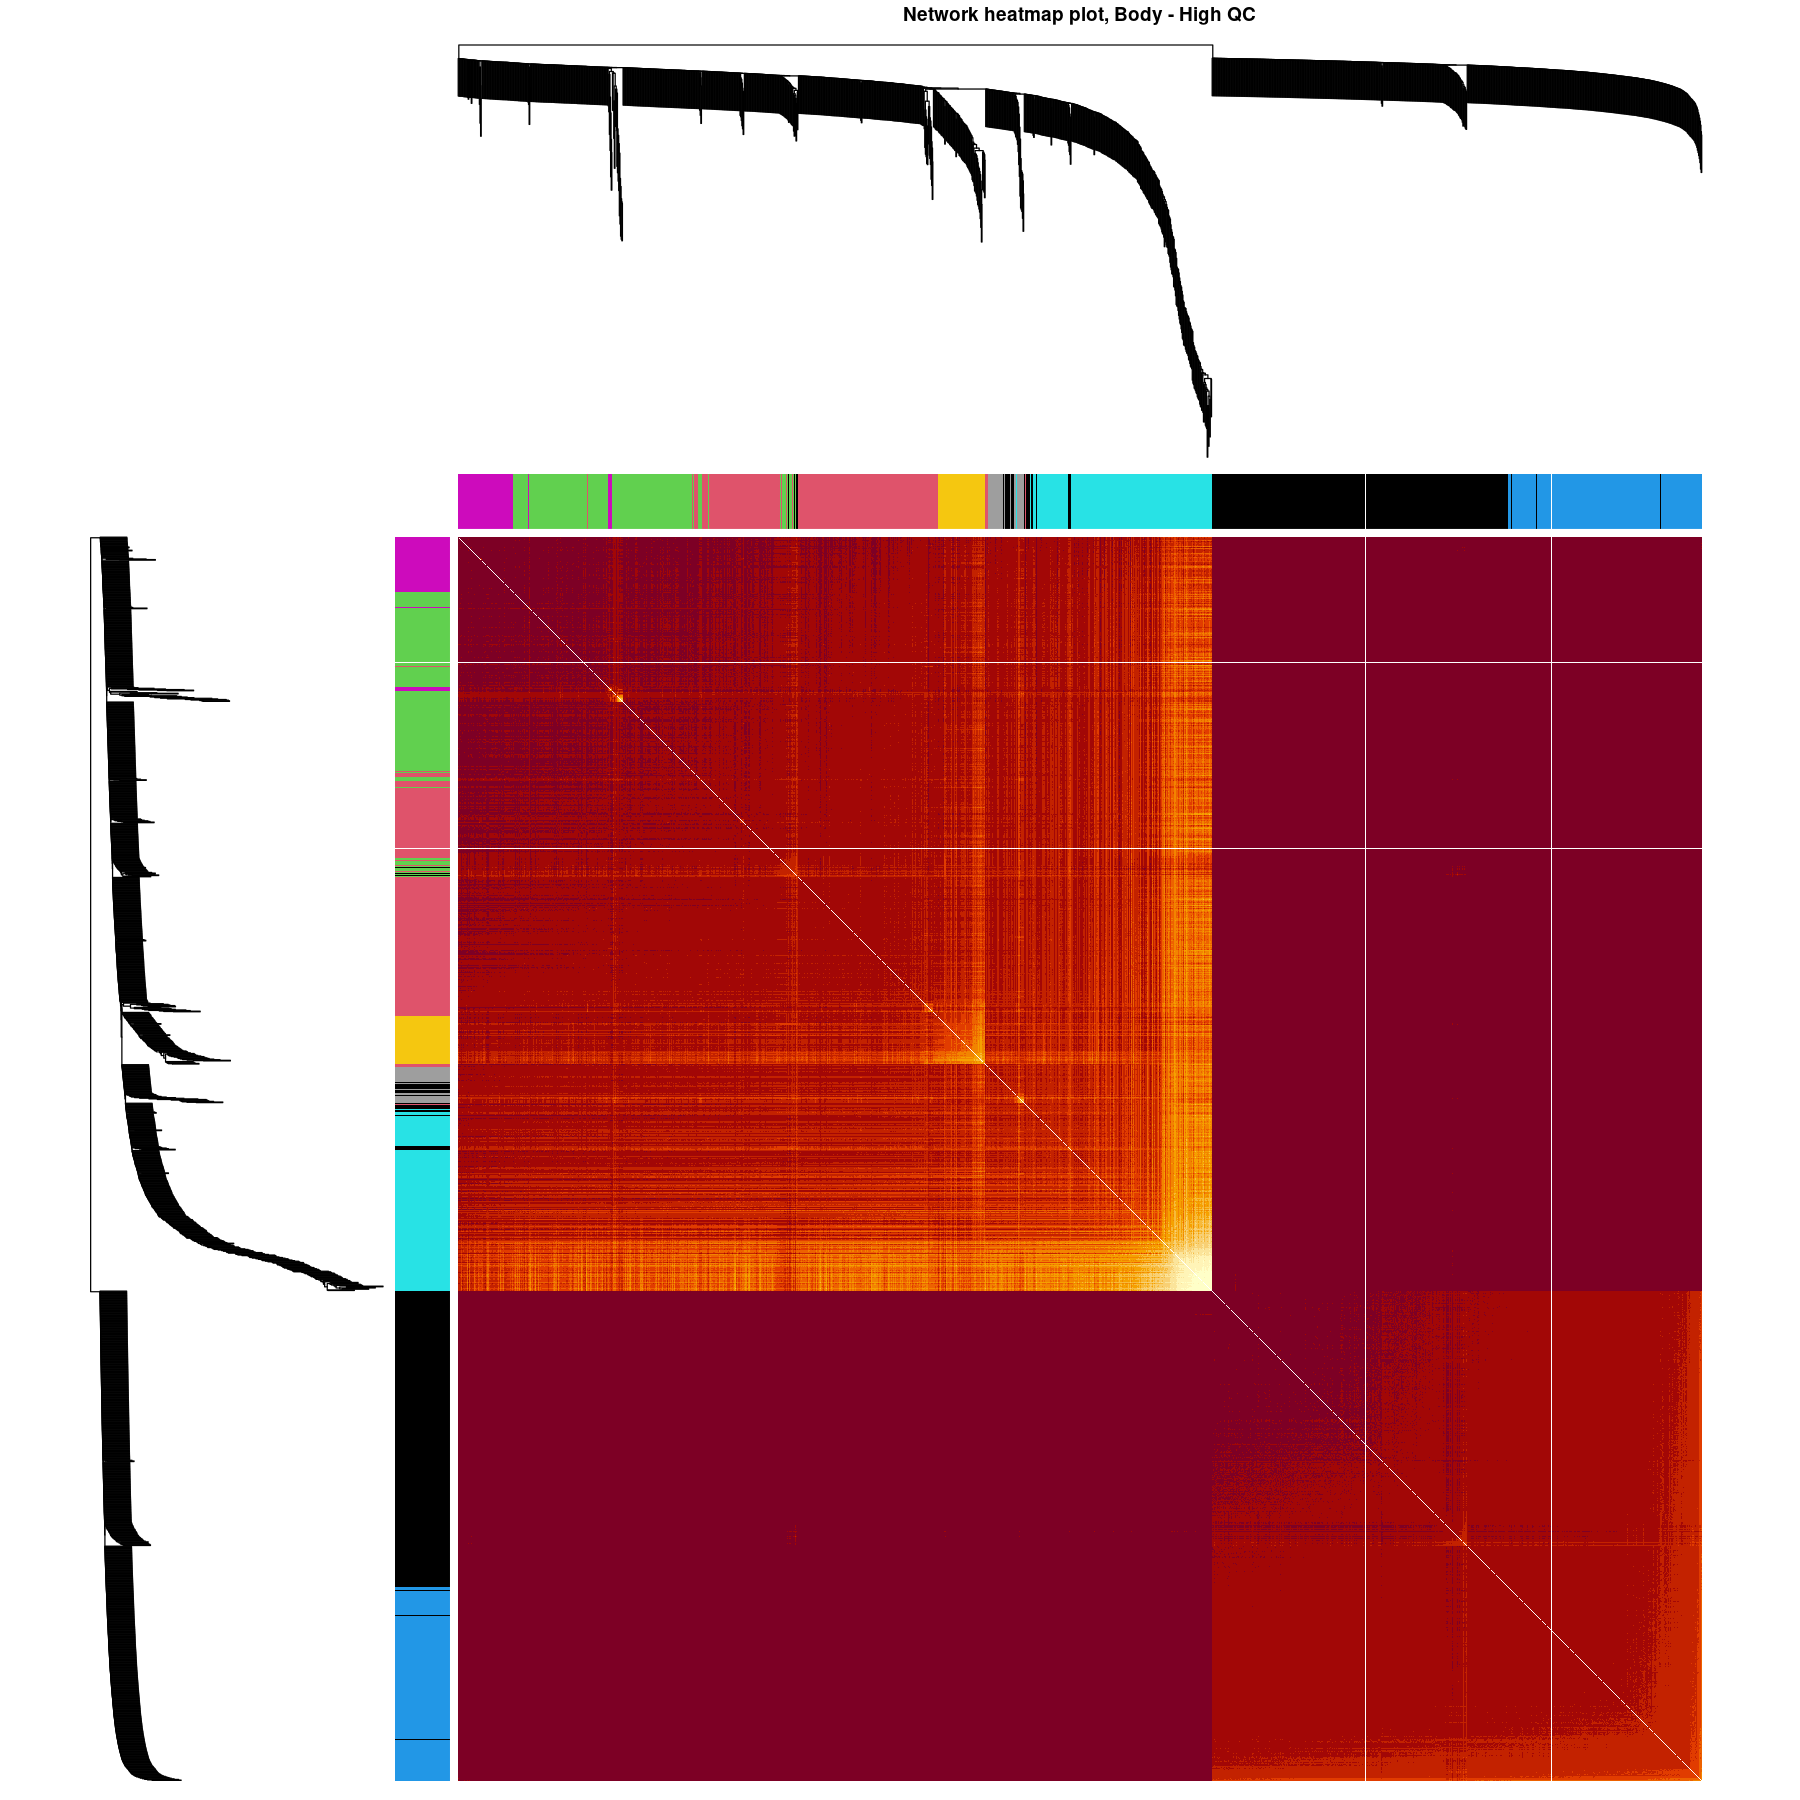

In [163]:
options(repr.plot.width=15, repr.plot.height=15)

data_index = "body"

nGenes = ncol(expr_list[[data_index]])
nSamples = nrow(expr_list[[data_index]])
dissTOM = dissTOM_list_bicor[[data_index]]

nSelect = 2000
nSelect = ifelse(sum((moduleColors != 0)) > 2000, 2000, sum((moduleColors != 0)))
moduleColors = body_modules
select = sample(which(moduleColors != 0), size = nSelect)

selectTOM = dissTOM[select, select];
selectTree = hclust(as.dist(selectTOM), method = "average")
selectColors = moduleColors[select];
plotDiss = selectTOM^7;
diag(plotDiss) = NA;
TOMplot(plotDiss, selectTree, selectColors, 
        main = "Network heatmap plot, Body - High QC")

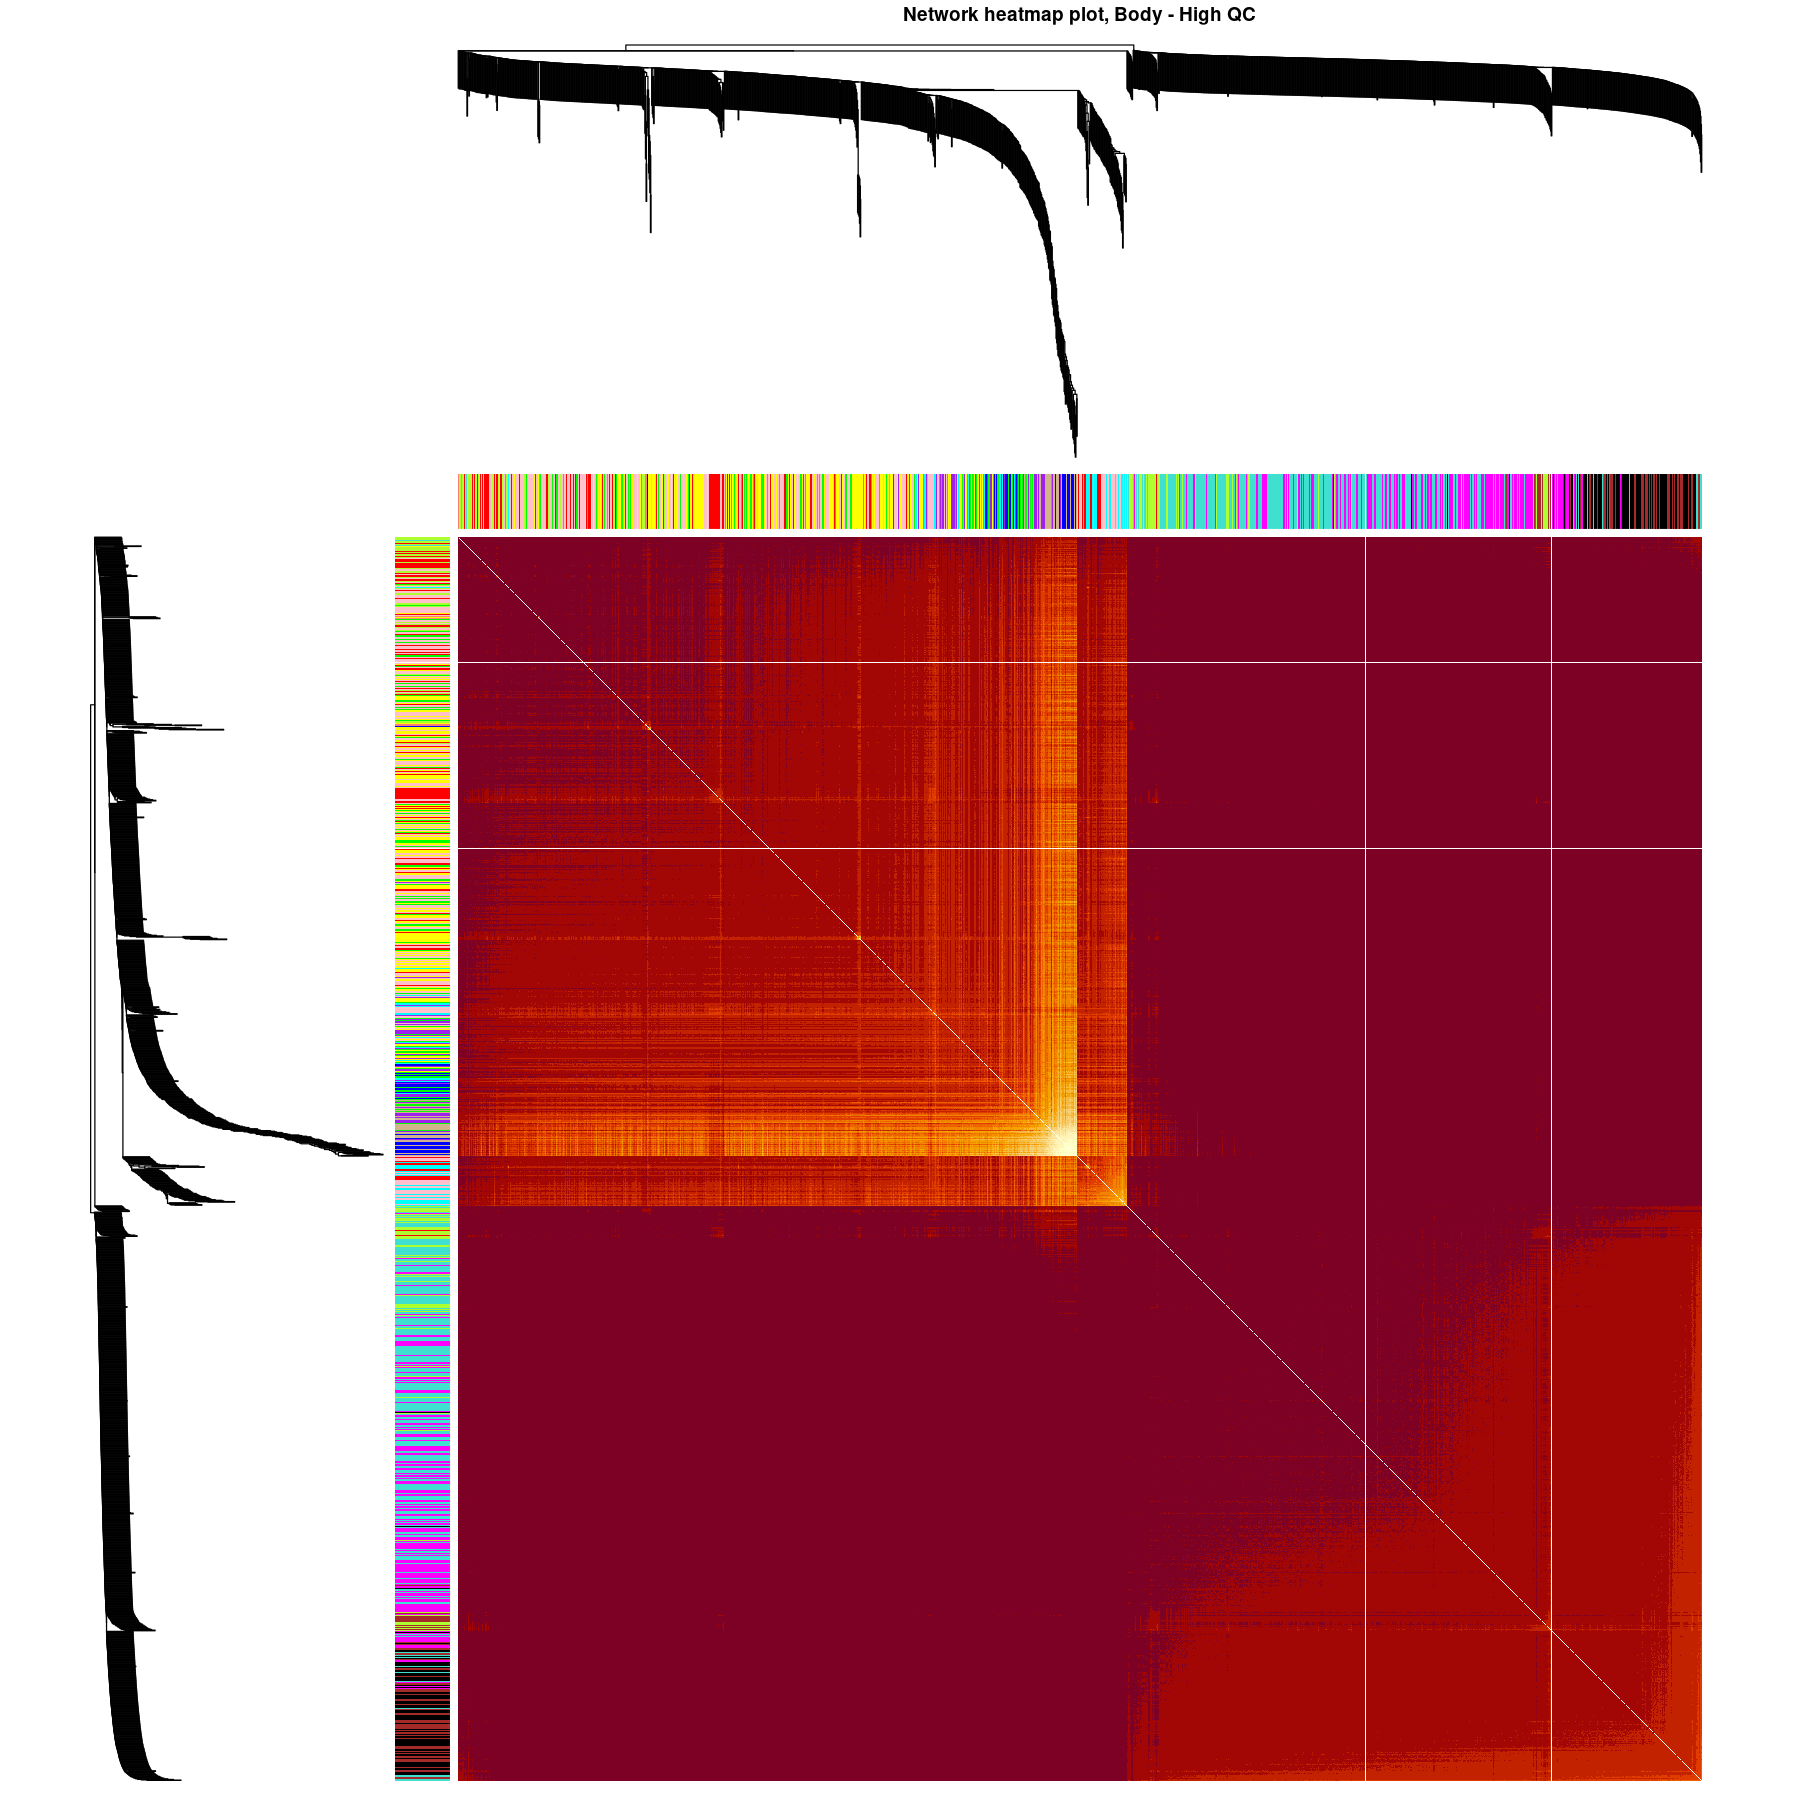

In [186]:
options(repr.plot.width=15, repr.plot.height=15)

data_index = "body"

nGenes = ncol(expr_list[[data_index]])
nSamples = nrow(expr_list[[data_index]])
dissTOM = dissTOM_list_bicor[[data_index]]

nSelect = 2000
nSelect = ifelse(sum((moduleColors != 0)) >= 2000, 2000, sum((moduleColors != 0)))
#moduleColors = labels2colors(body_hsbm$B2+1, colorSeq = viridis::plasma(length(unique(body_hsbm$B2+1))))
moduleColors = labels2colors(body_hsbm$B2+1)

select = sample(which(moduleColors != 0), size = nSelect)

selectTOM = dissTOM[select, select];
selectTree = hclust(as.dist(selectTOM), method = "average")
selectColors = moduleColors[select];
plotDiss = selectTOM^7;
diag(plotDiss) = NA;
TOMplot(plotDiss, selectTree, selectColors, 
        main = "Network heatmap plot, Body - High QC")

In [170]:
names(head_modules) = colnames(expr_list$head)
names(body_modules) = colnames(expr_list$body)

In [187]:
Head_hsbm = read_csv("../data/output/SBM/clustering/head_weights-spearman_fdr-1e-04_mcmc_mode_hierarchical-SBM.csv")
Head_hsbm$X1 = NULL
Head_hsbm$tissue = "head"
Head_hsbm$WGCNA = head_modules[Head_hsbm$Gene]

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  Gene = col_character(),
  Degree = col_double(),
  E_corr = col_double(),
  B1 = col_double(),
  B2 = col_double(),
  B3 = col_double(),
  B4 = col_double(),
  B5 = col_double(),
  B6 = col_double(),
  B7 = col_double()
)




In [188]:
body_hsbm = read_csv("../data/output/SBM/clustering/body_weights-spearman_fdr-1e-05_mcmc_mode_hierarchical-SBM.csv")
body_hsbm$X1 = NULL
body_hsbm$tissue = "body"
body_hsbm$WGCNA = body_modules[body_hsbm$Gene]

WGCNA_HSBM = rbind(body_hsbm, Head_hsbm)

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  Gene = col_character(),
  Degree = col_double(),
  E_corr = col_double(),
  B1 = col_double(),
  B2 = col_double(),
  B3 = col_double(),
  B4 = col_double(),
  B5 = col_double(),
  B6 = col_double(),
  B7 = col_double()
)




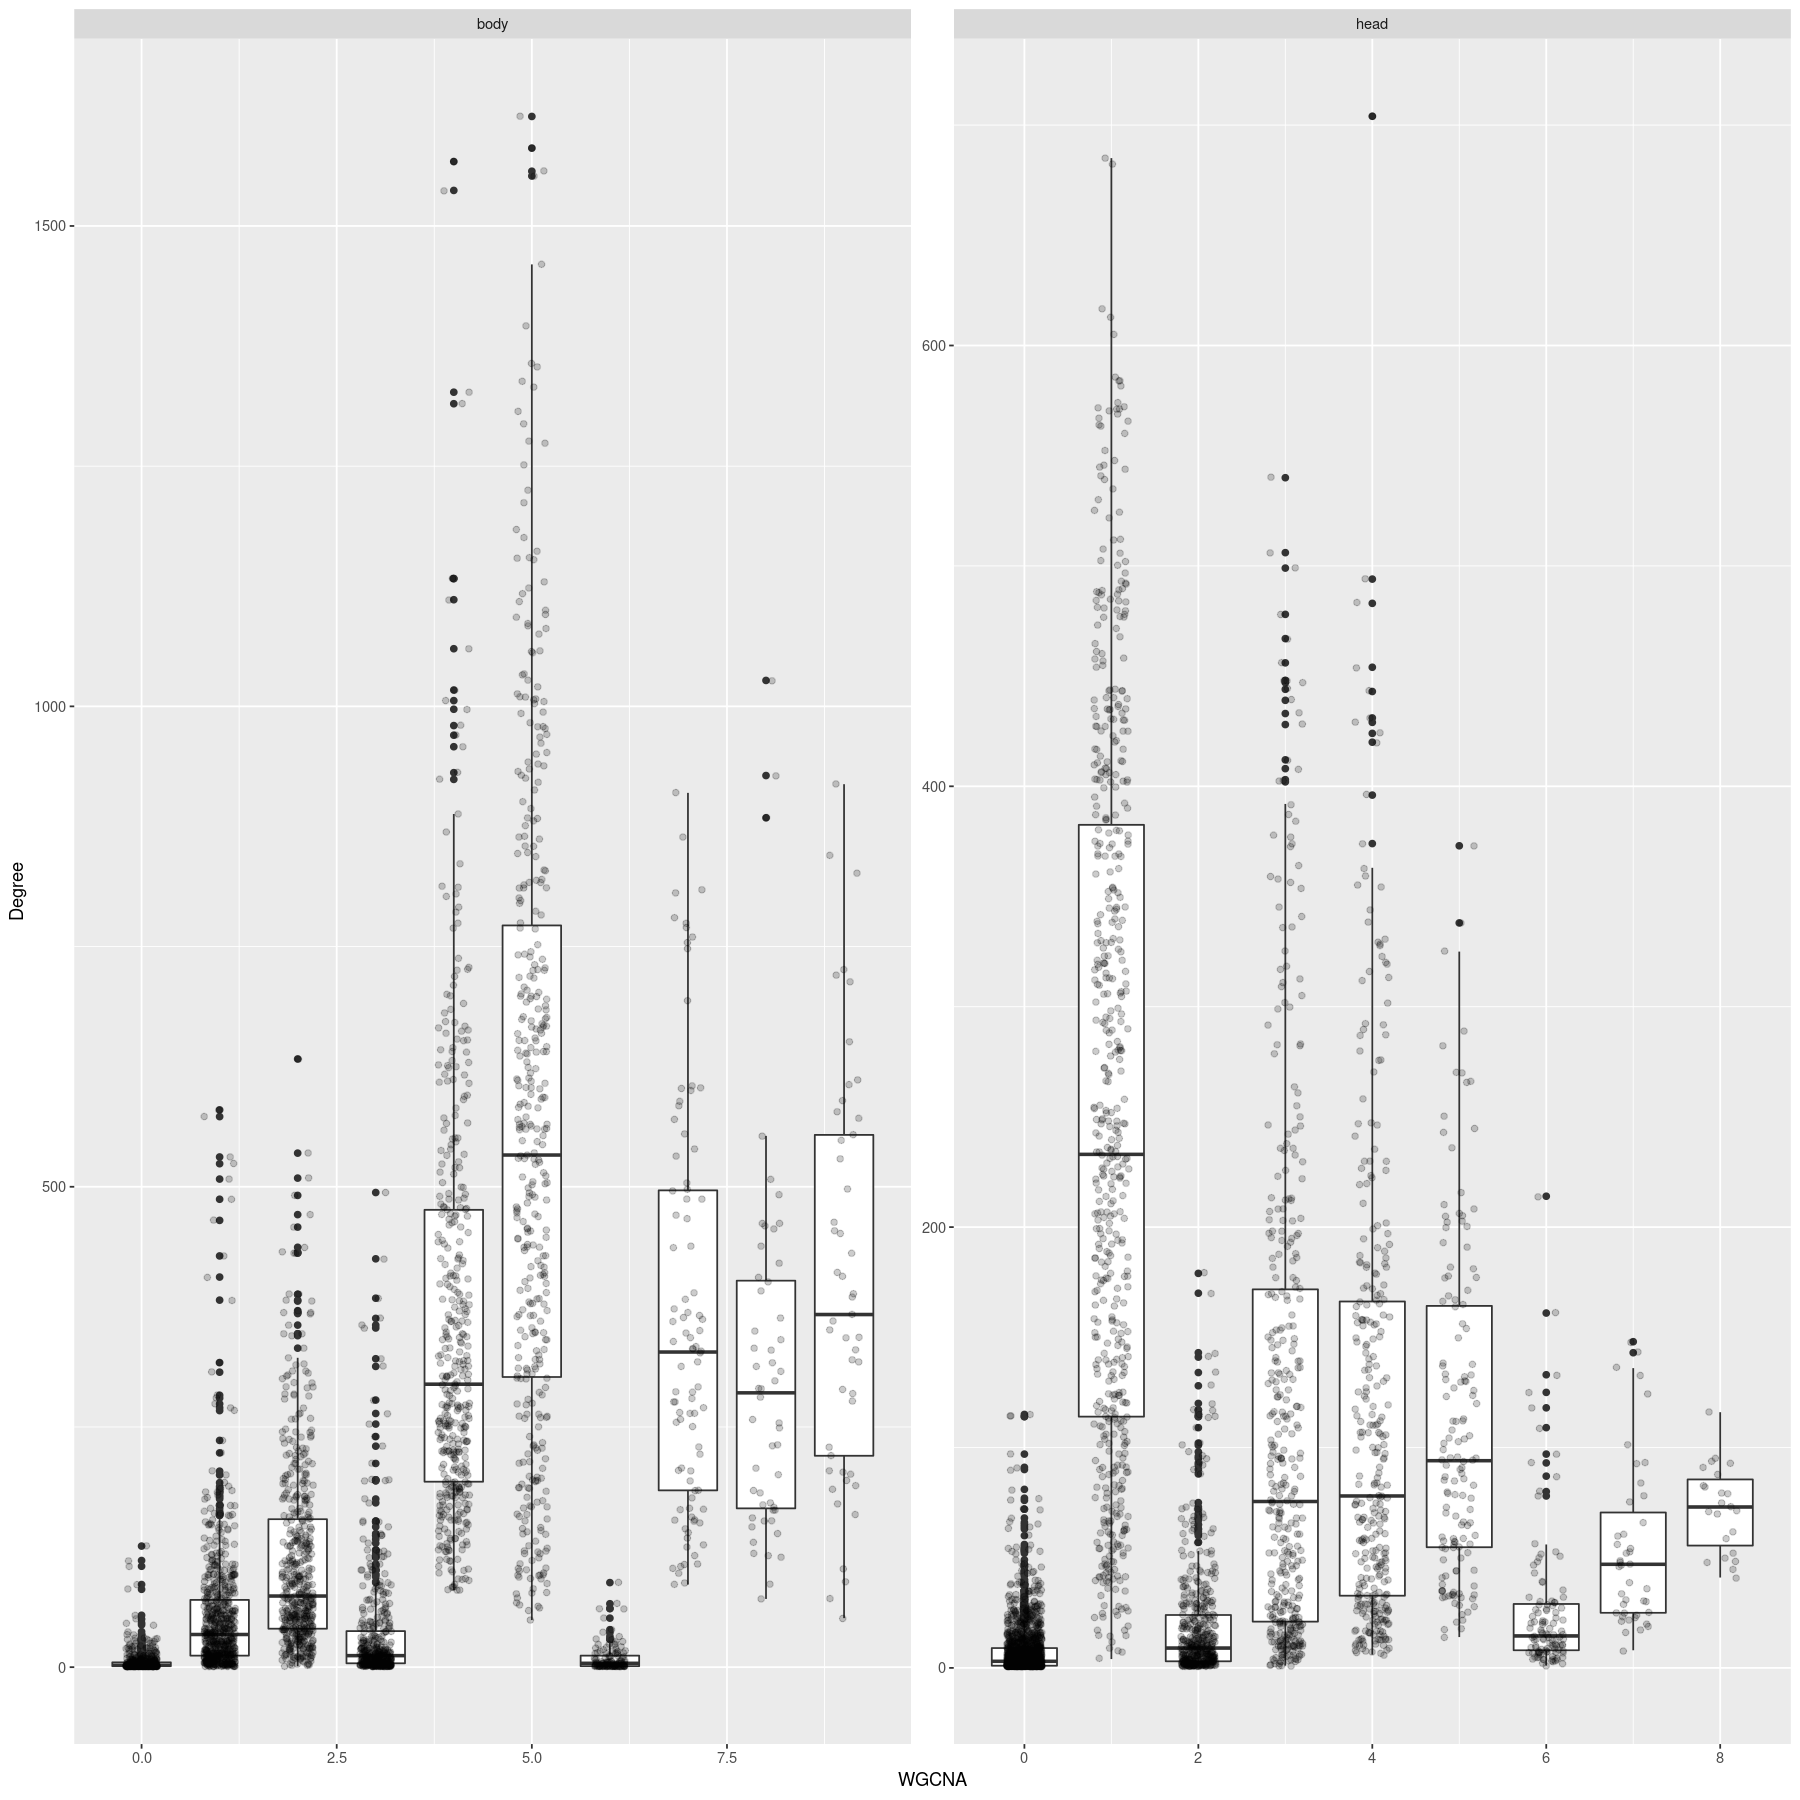

In [205]:
WGCNA_HSBM %>%
    ggplot(aes(WGCNA, Degree)) + 
    geom_boxplot(aes(group = WGCNA)) +
    geom_jitter(alpha = 0.2, width = 0.2) + 
    facet_wrap(~tissue, scales = "free")

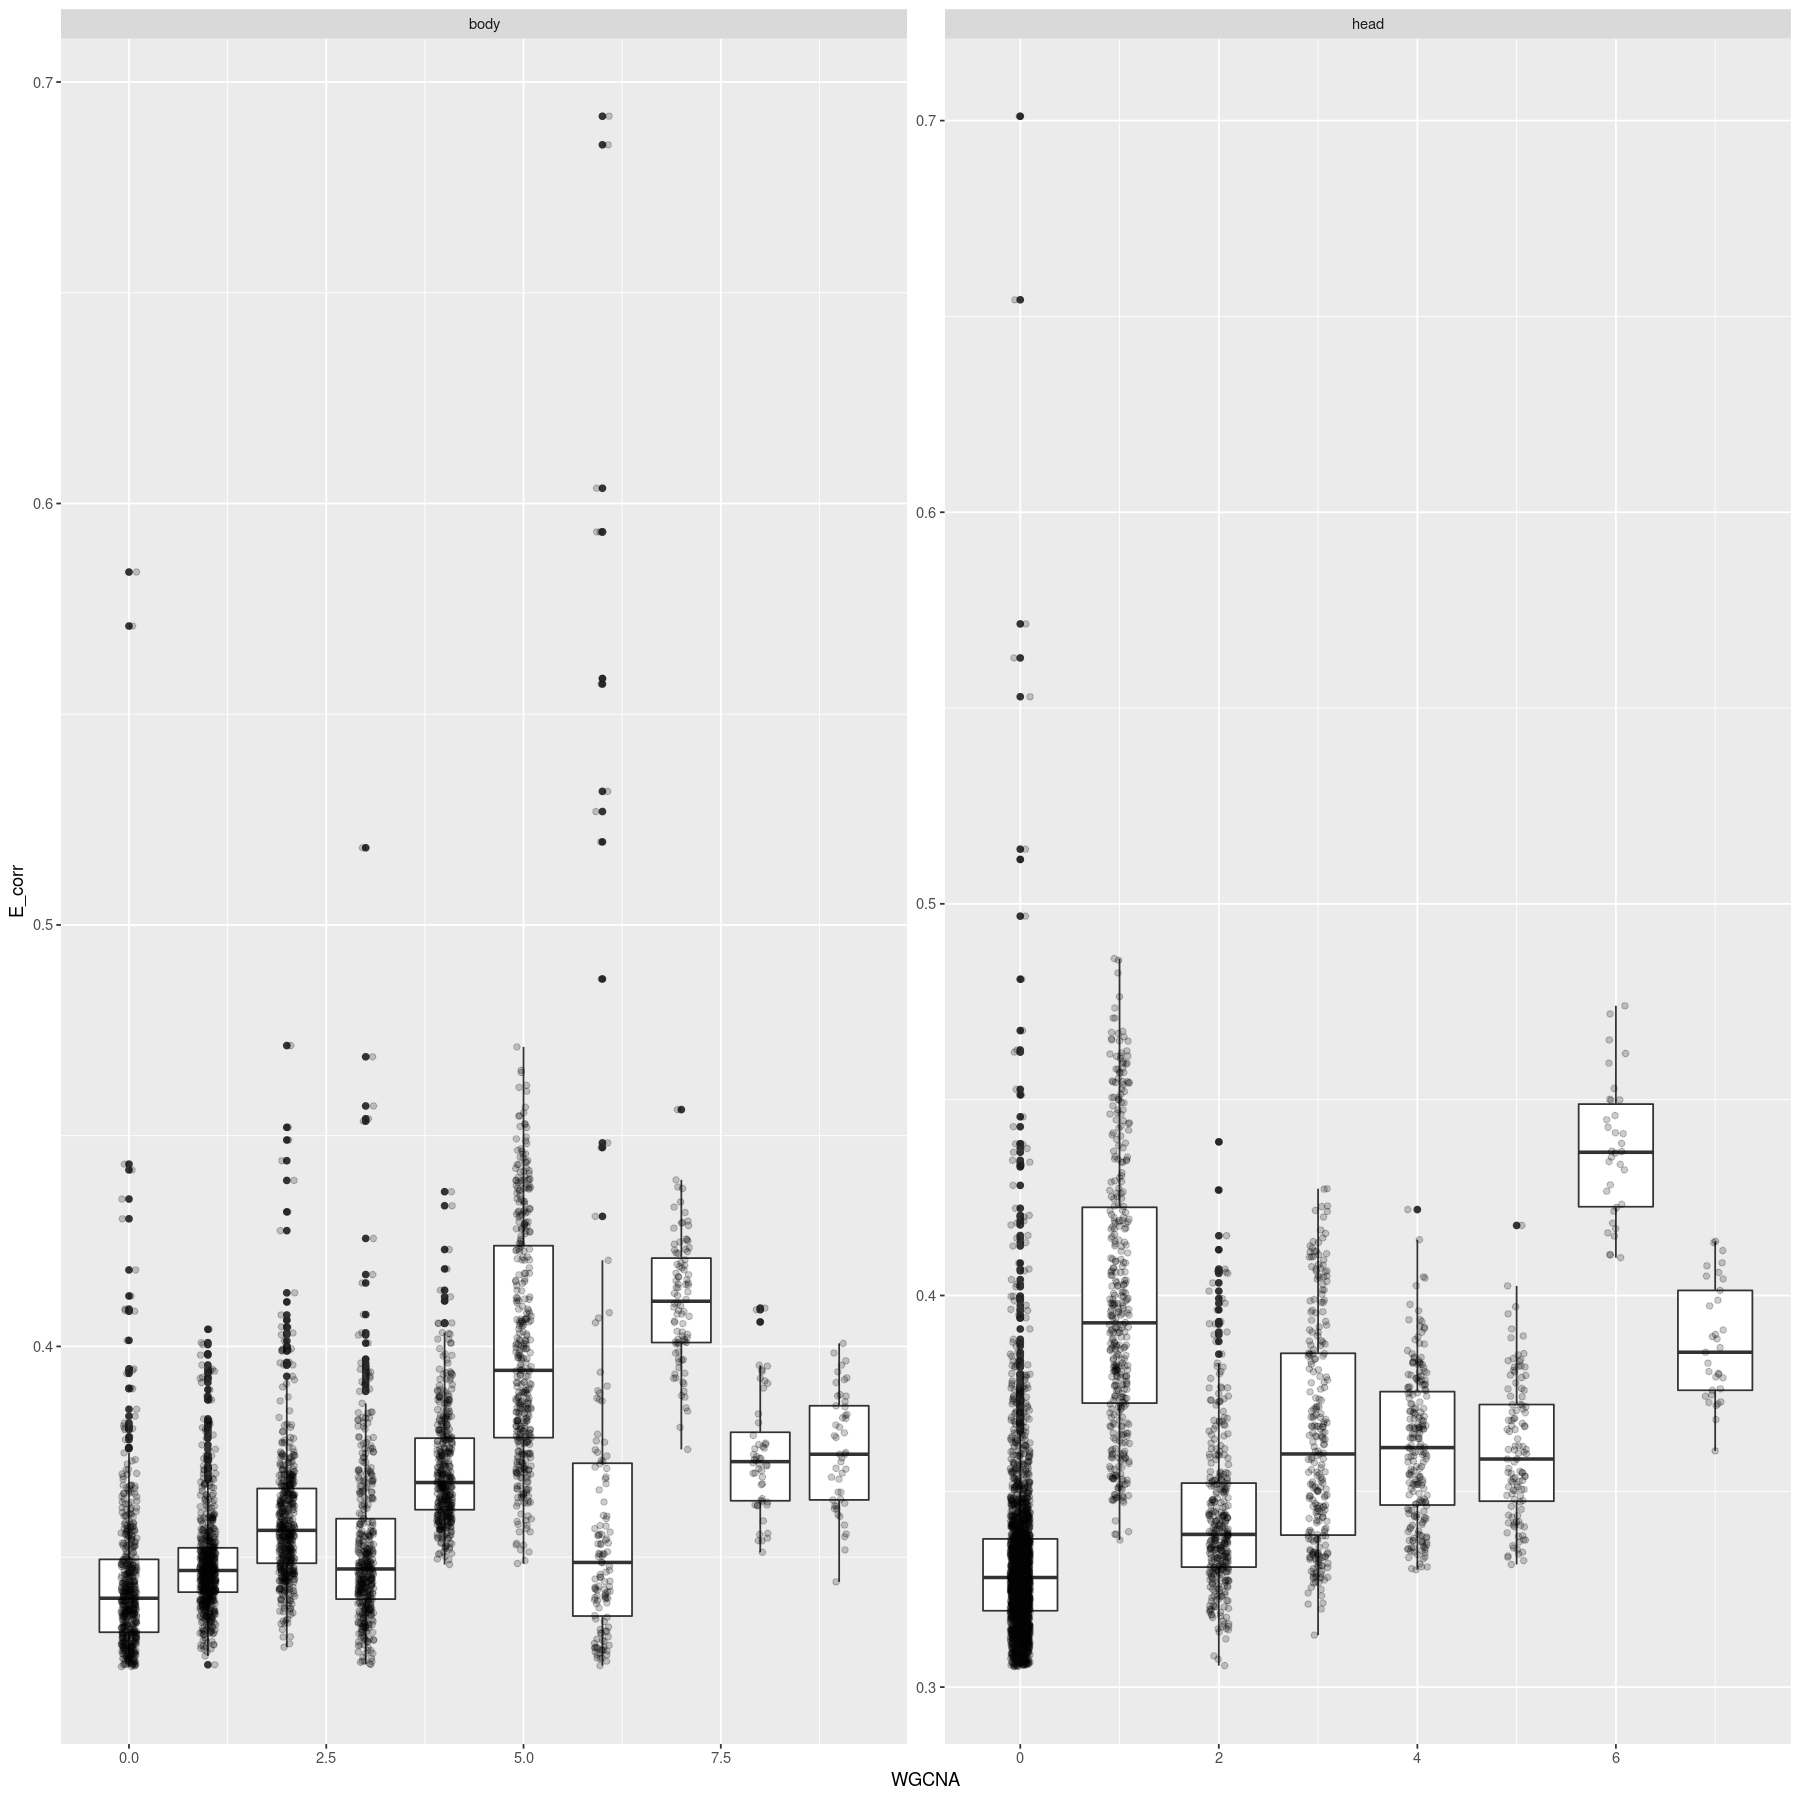

In [146]:
WGCNA_HSBM %>%
    ggplot(aes(WGCNA, E_corr)) + 
    geom_boxplot(aes(group = WGCNA)) +
    geom_jitter(alpha = 0.2, width = 0.1) + 
    facet_wrap(~tissue, scales = "free")

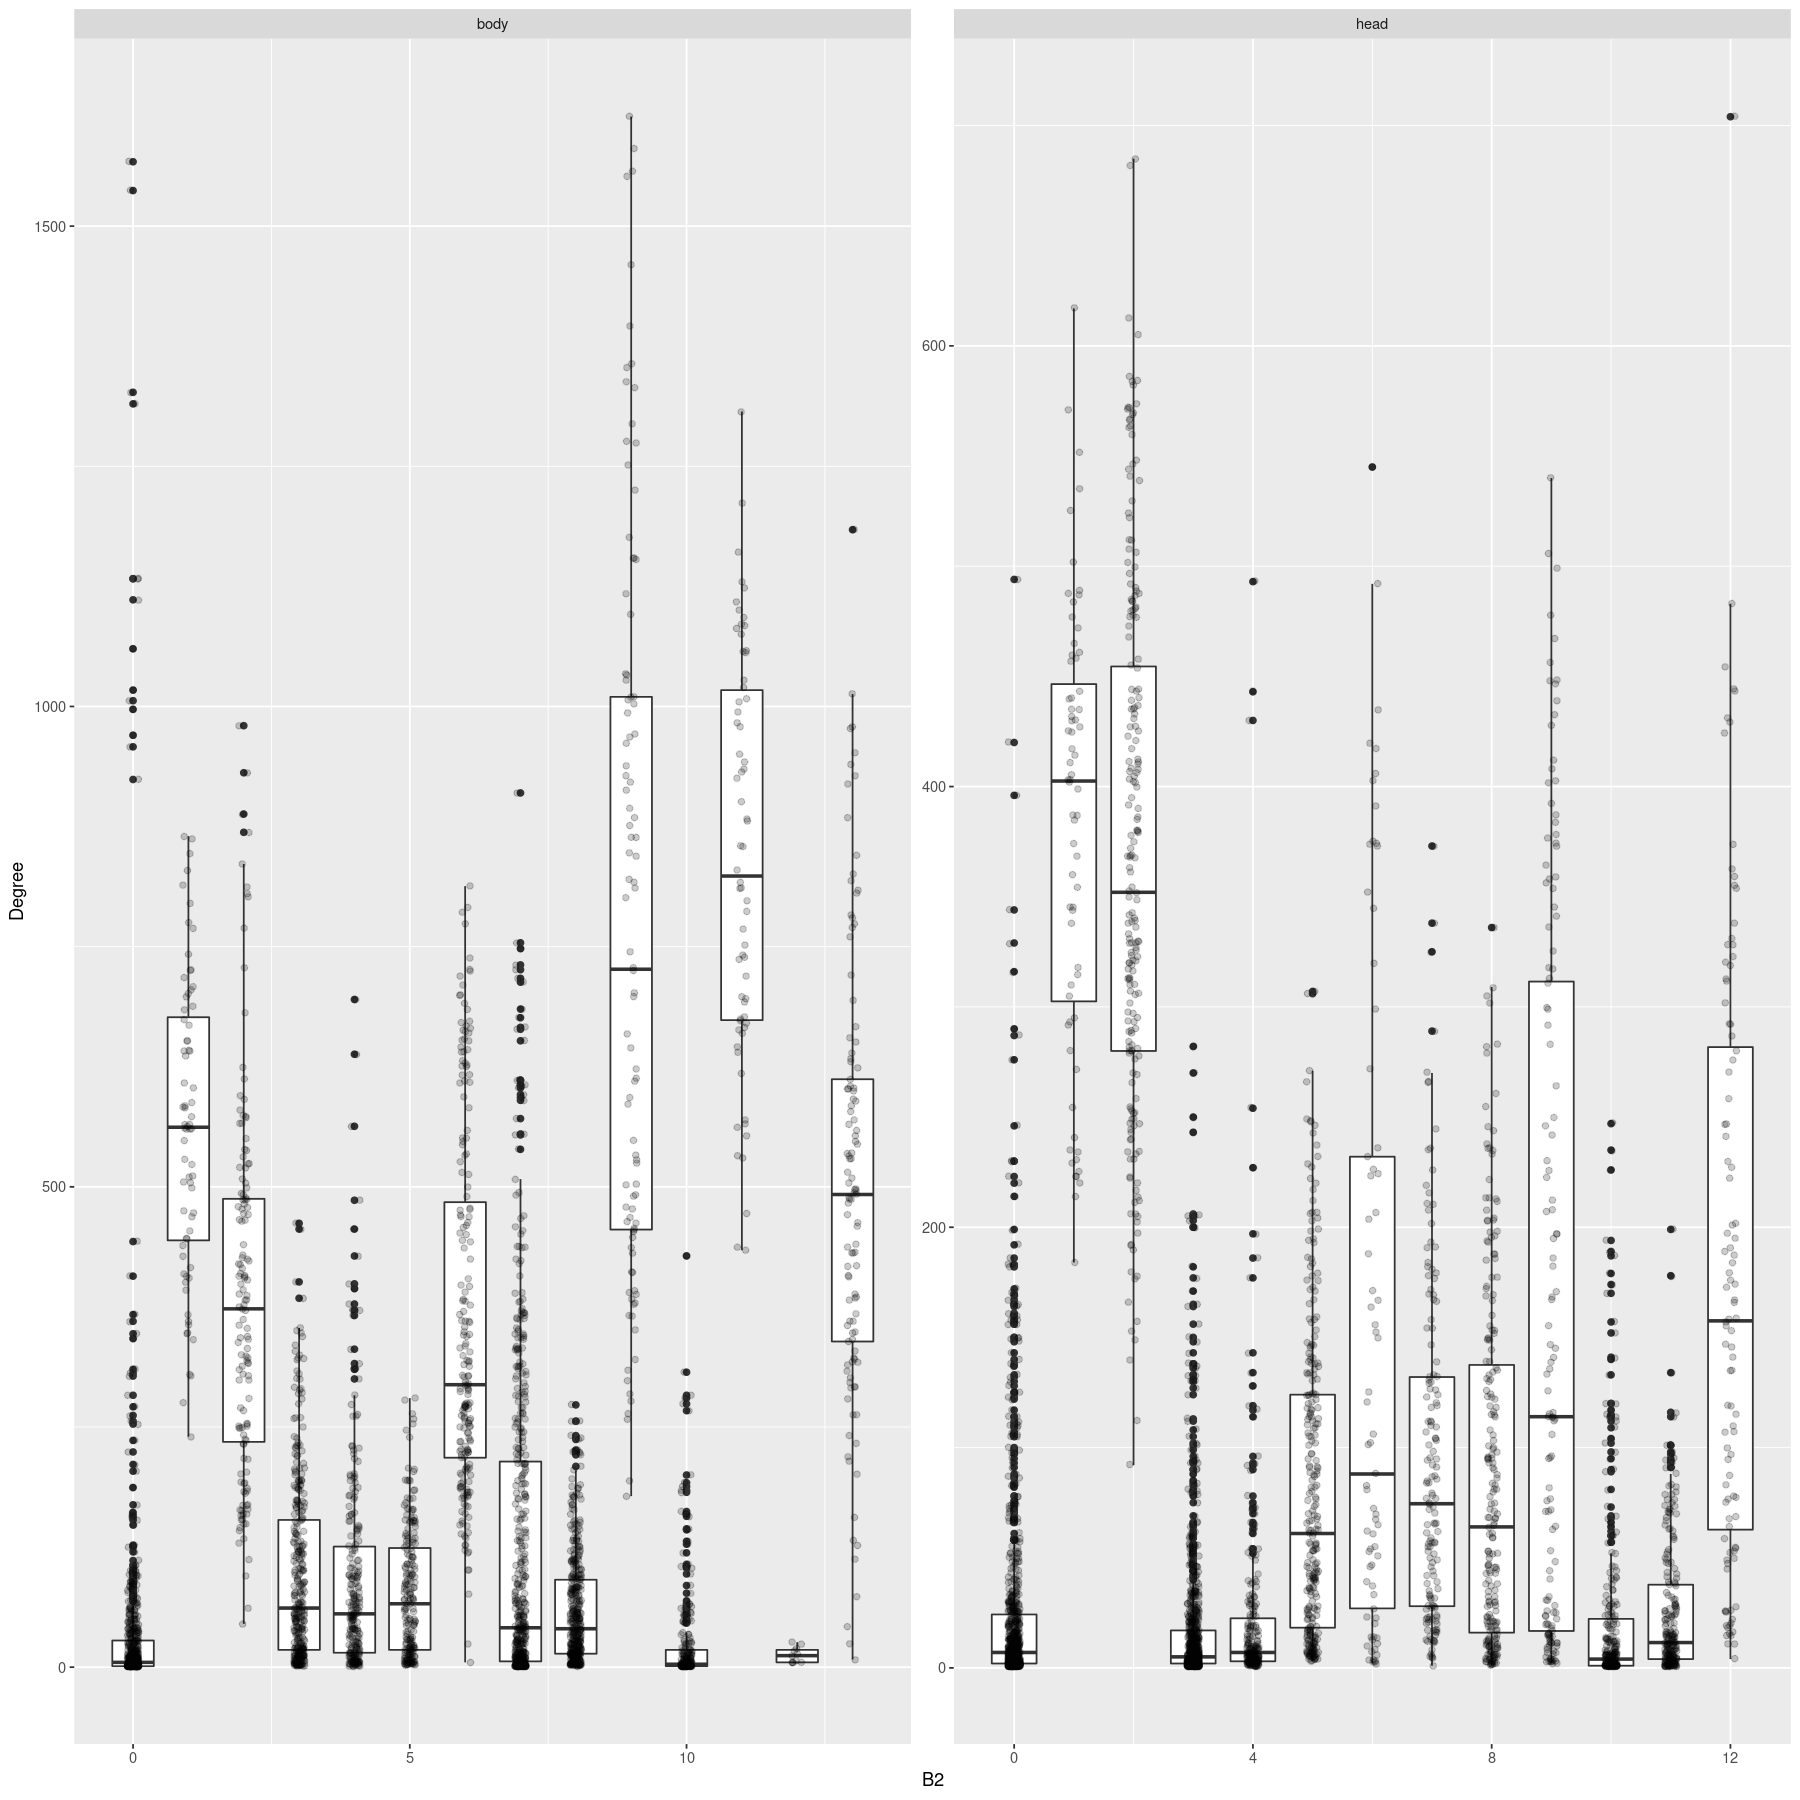

In [147]:
WGCNA_HSBM %>%
    ggplot(aes(B2, Degree)) + 
    geom_boxplot(aes(group = B2)) +
    geom_jitter(alpha = 0.2, width = 0.1) + 
    facet_wrap(~tissue, scales = "free")

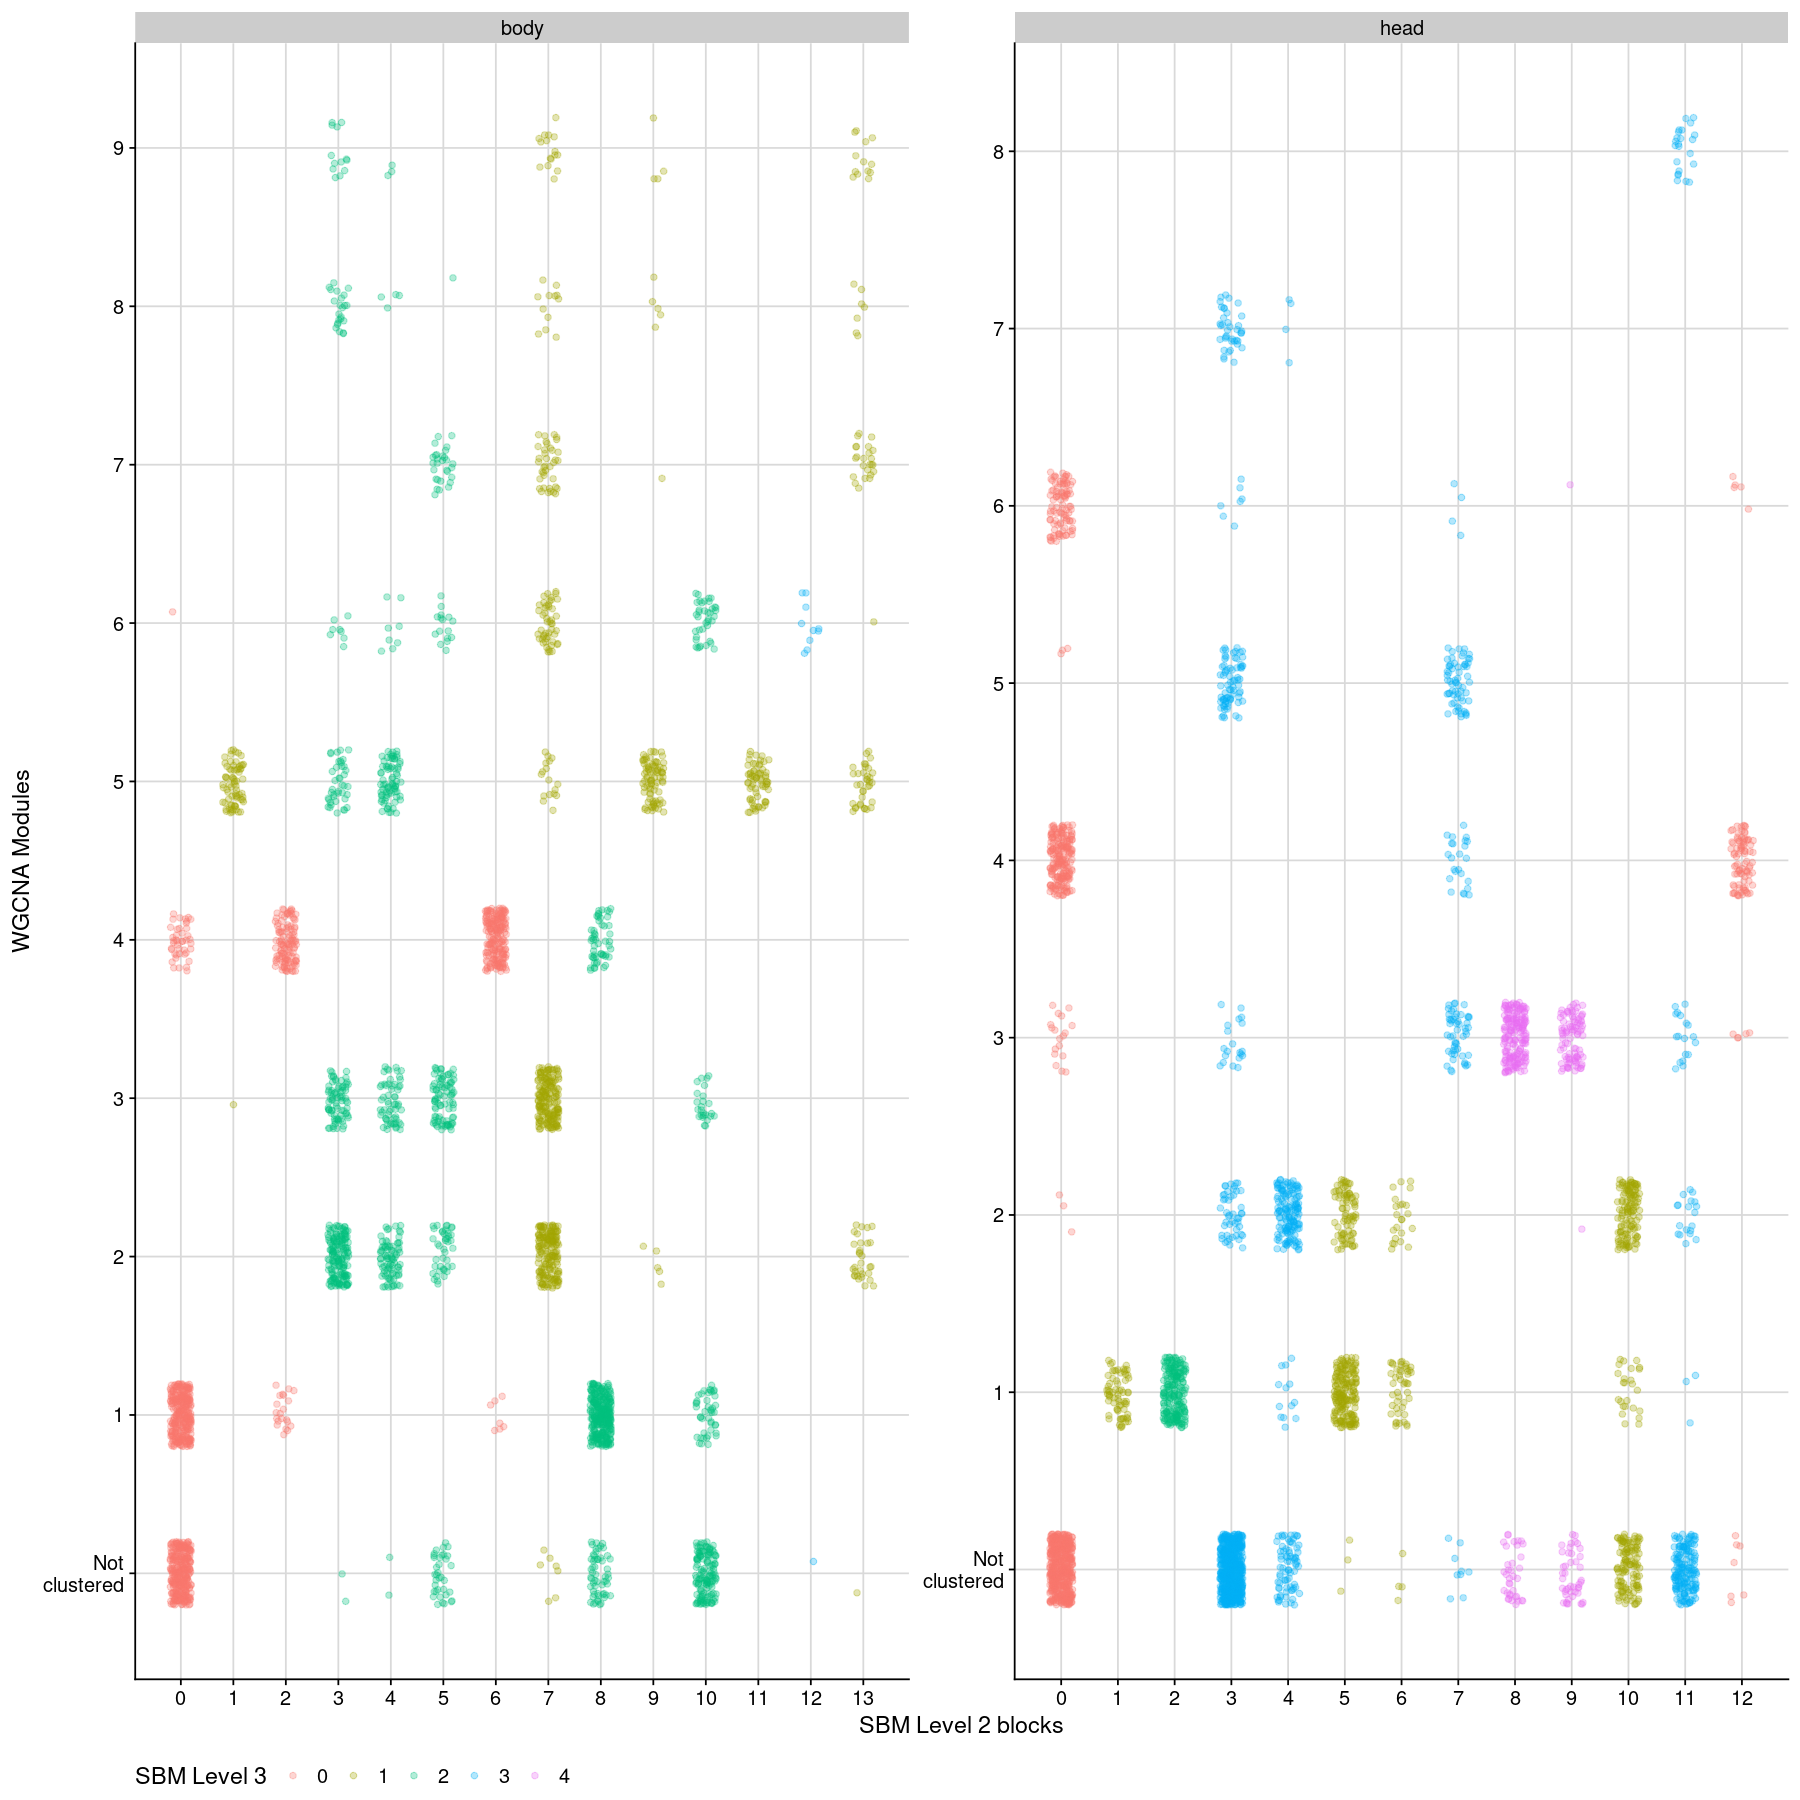

In [209]:
WGCNA_HSBM %>%
    mutate(B3 = as.factor(B3), B1 = as.factor(B1)) %>%
    ggplot(aes(B2, WGCNA, color = B3)) + 
    geom_jitter(width = 0.2, height = 0.2, alpha = 0.3) + facet_wrap(~tissue, scales = "free") + 
    scale_y_continuous(breaks = 0:10, labels = c("Not\nclustered", 1:10)) + scale_x_continuous(breaks = 0:20) + 
    theme_cowplot() + background_grid() + labs(y = "WGCNA Modules", x = "SBM Level 2 blocks") + 
    scale_color_discrete(name = "SBM Level 3") + theme(legend.position = "bottom") -> plot 
plot
save_plot("../data/output/SBM/plots/WGCNA_comparison.png", plot, base_height = 7, ncol = 2, base_asp = 1.2)

In [93]:
for(t in unique(WGCNA_HSBM$tissue)){
    fdr = c("body"= 5, "head"=4)
    out_dir = paste0("../data/output/SBM/clustering/", t, "_weights-spearman_fdr-1e-0", fdr[t],"_mcmc_mode_hierarchical-SBM_gene-blocks/WGCNA")
    if(dir.exists(out_dir)) {
        for(i in dir(out_dir, full.names = TRUE))
            file.remove(i)
    } else 
        dir.create(out_dir, recursive = T)
    WGCNA_HSBM_t = WGCNA_HSBM %>% filter(tissue == t)
    for(block in unique(WGCNA_HSBM_t$WGCNA)){
        WGCNA_HSBM_t %>%
            filter(WGCNA == block) %>%
            select(Gene) %>% 
            write_csv(file.path(out_dir, paste0("wgcna_", block, ".csv")), col_names = FALSE)     
    }
}
    

In [203]:
table(body_modules!=0)


FALSE  TRUE 
  536  2717 

In [204]:
table(head_modules!=0)


FALSE  TRUE 
 1557  2032 